In [ ]:
# example of fitting a neural net on x vs x^2
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from numpy import asarray
from matplotlib import pyplot

In [ ]:
# define the dataset
x = asarray([i for i in np.linspace(-10,10,500)])
y = asarray([np.sin(i) + np.cos(i) +  0.1* np.random.randn() for i in x])
print(x.min(), x.max(), y.min(), y.max())

-10.0 10.0 -1.6354715274808733 1.6443522872142133


In [ ]:
# reshape arrays into into rows and cols
x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))
# separately scale the input and output variables
scale_x = RobustScaler()
x = scale_x.fit_transform(x)
scale_y = RobustScaler()
y = scale_y.fit_transform(y)
print(x.min(), x.max(), y.min(), y.max())

-1.0 1.0 -0.742428629945515 0.9169762488737007


In [ ]:
# design the neural network model
model = Sequential()
model.add(Dense(30, input_dim=1, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dense(20, activation='tanh', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='tanh', kernel_initializer='he_uniform'))
model.add(Dense(1))
# define the loss function and optimization algorithm
model.compile(loss='mse', optimizer='adam')
# ft the model on the training datasetadam
model.fit(x, y, epochs=300, batch_size=20, verbose=1)
# make predictions for the input data
yhat = model.predict(x)

Epoch 1/300
25/25 [==============================] - 1s 2ms/step - loss: 0.2965
Epoch 2/300
25/25 [==============================] - 0s 2ms/step - loss: 0.2541
Epoch 3/300
25/25 [==============================] - 0s 1ms/step - loss: 0.2545
Epoch 4/300
25/25 [==============================] - 0s 1ms/step - loss: 0.2536
Epoch 5/300
25/25 [==============================] - 0s 1ms/step - loss: 0.2511
Epoch 6/300
25/25 [==============================] - 0s 1ms/step - loss: 0.2472
Epoch 7/300
25/25 [==============================] - 0s 2ms/step - loss: 0.2319
Epoch 8/300
25/25 [==============================] - 0s 1ms/step - loss: 0.2458
Epoch 9/300
25/25 [==============================] - 0s 1ms/step - loss: 0.2469
Epoch 10/300
25/25 [==============================] - 0s 1ms/step - loss: 0.2207
Epoch 11/300
25/25 [==============================] - 0s 1ms/step - loss: 0.2192
Epoch 12/300
25/25 [==============================] - 0s 1ms/step - loss: 0.2245
Epoch 13/300
25/25 [=================

In [ ]:
# inverse transforms
x_plot = scale_x.inverse_transform(x)
y_plot = scale_y.inverse_transform(y)
yhat_plot = scale_y.inverse_transform(yhat)
# report model error
print('MSE: %.3f' % mean_squared_error(y_plot, yhat_plot))

MSE: 0.014


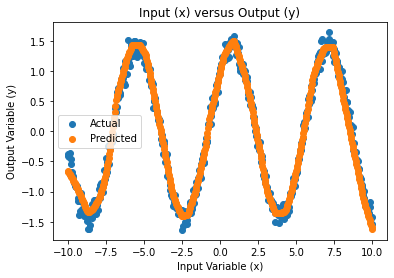

In [ ]:
# plot x vs y
pyplot.scatter(x_plot,y_plot, label='Actual')
# plot x vs yhat
pyplot.scatter(x_plot,yhat_plot, label='Predicted')
pyplot.title('Input (x) versus Output (y)')
pyplot.xlabel('Input Variable (x)')
pyplot.ylabel('Output Variable (y)')
pyplot.legend()
pyplot.show()